In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from pathlib import Path
import json

Load data from folder containing parquets

In [2]:
# Read all of the exmaple parquets
df = pd.read_parquet("../data/example_data/")

print(f"Number of samples in all parquets in the folder: {len(df)}")

Number of samples in all parquets in the folder: 200


Load Meta data for information about the spectrum

In [3]:
with open("../data/meta_data/meta_data_dict.json") as json_file:
    meta_data = json.load(json_file)

meta_data.keys()

dict_keys(['smiles', 'molecular_formula', 'h_nmr_spectra', 'c_nmr_spectra', 'h_nmr_peaks', 'c_nmr_peaks', 'hsqc_nmr_spectrum', 'hsqc_nmr_peaks', 'ir_spectra', 'msms_cfmid_positive_10ev', 'msms_cfmid_positive_20ev', 'msms_cfmid_positive_40ev', 'msms_cfmid_fragments_positive', 'msms_cfmid_negative_10ev', 'msms_cfmid_negative_20ev', 'msms_cfmid_negative_40ev', 'msms_cfmid_fragments_negative', 'msms_iceberg_positive', 'msms_iceberg_fragments_positive', 'msms_scarf_positive', 'msms_scarf_fragments_positive'])

## Plot IR spectrum

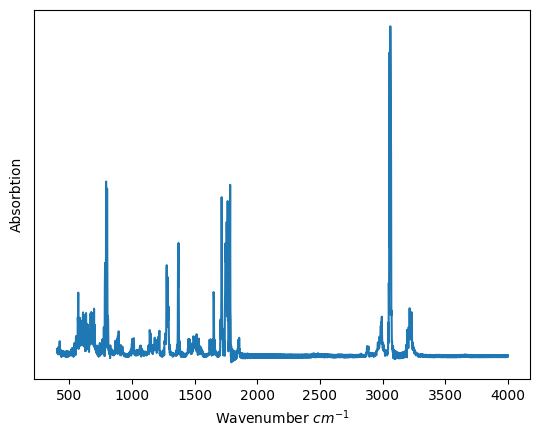

In [4]:
random_sample = df.sample(1)

ir_spectrum = random_sample["ir_spectra"].tolist()[0]
ir_dimension = meta_data["ir_spectra"]["dimensions"]


plt.plot(ir_dimension, ir_spectrum)
plt.xlabel("Wavenumber $cm^{-1}$")
plt.ylabel("Absorbtion")
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

Correct the wave number so it matches how spectras are usually plotted, change from absorption to transmission

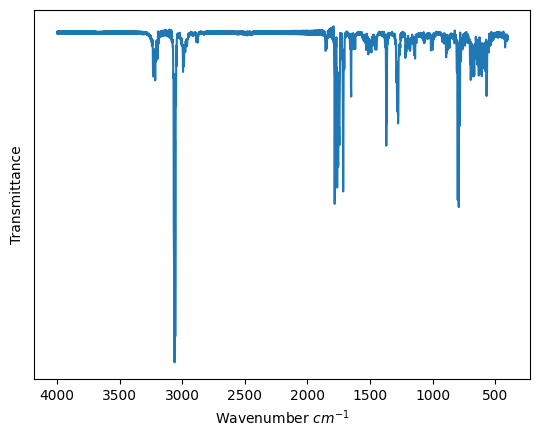

In [5]:
ir_spectrum = 1 - random_sample["ir_spectra"].tolist()[0][::-1]
ir_dimension = meta_data["ir_spectra"]["dimensions"][::-1]

fig = plt.plot(ir_dimension, ir_spectrum)
plt.xlabel("Wavenumber $cm^{-1}$")
plt.ylabel("Transmittance")
plt.gca().invert_xaxis()
plt.gca().axes.get_yaxis().set_ticks([])
plt.show()

## H-NMR Plots

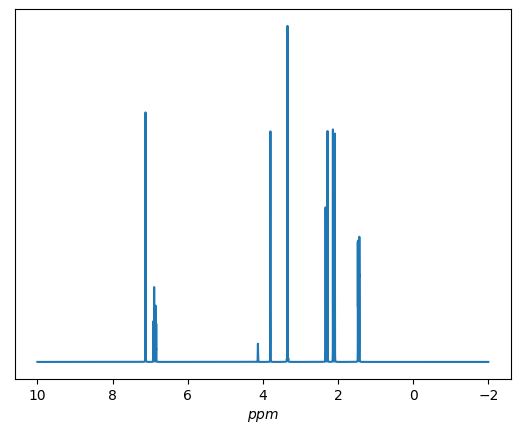

In [7]:
def plot_1H(spectrum, spec_dim, save_path=None):
    plt.plot(spec_dim, spectrum)
    plt.xlabel("$ppm$")

    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().invert_xaxis()

    if save_path is not None:
        plt.savefig(save_path / "h_nmr.png", dpi=300, bbox_inches="tight")
    plt.show()


random_sample = df.sample(1)

hnmr_spectrum = random_sample["h_nmr_spectra"].tolist()[0]
hnmr_dimension = meta_data["h_nmr_spectra"]["dimensions"]
plot_1H(hnmr_spectrum, hnmr_dimension)


## Plot C13-NMR

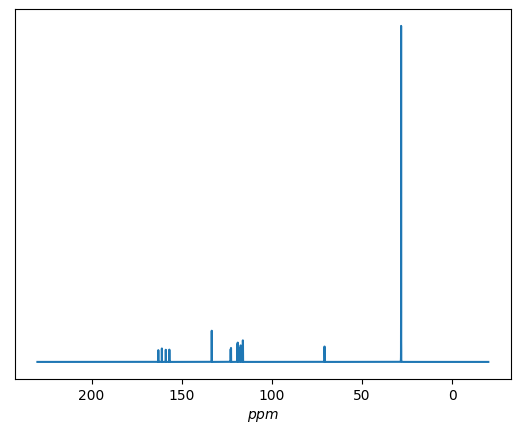

In [8]:
def plot_13C(spectrum, spec_dim, save_path=None):
    plt.plot(spec_dim, spectrum)
    plt.xlabel("$ppm$")

    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().invert_xaxis()

    if save_path is not None:
        plt.savefig(save_path / "c_nmr.png", dpi=300, bbox_inches="tight")
    plt.show()


random_sample = df.sample(1)

cnmr_spectrum = random_sample["c_nmr_spectra"].tolist()[0]
cnmr_dimension = meta_data["c_nmr_spectra"]["dimensions"]
plot_13C(cnmr_spectrum, cnmr_dimension)


## Plot MS/MS

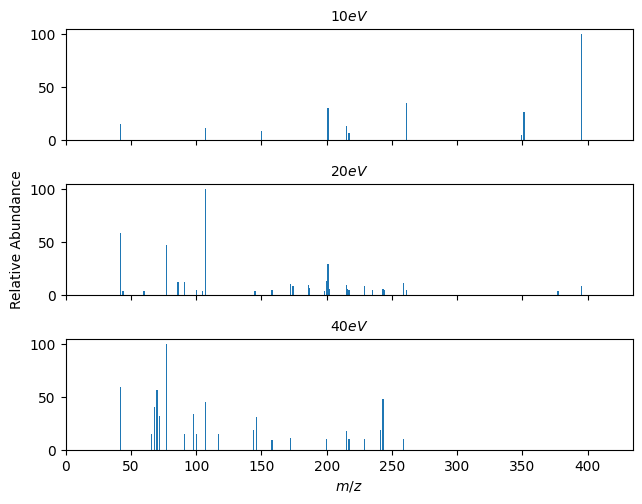

In [9]:
def plot_negative_msms(energy_0, energy_1, energy_2, save_path=None):
    figure, axis = plt.subplots(3, 1)
    figure.tight_layout()

    max_x_value = max(energy_0[:, 0]) + max(energy_0[:, 0]) * 0.1

    axis[0].bar(energy_0[:, 0], energy_0[:, 1], width=1)
    axis[0].set_xlim(0, max_x_value)
    axis[0].xaxis.set_ticklabels([])
    axis[0].set_title("$10eV$", fontsize=10)

    axis[1].bar(energy_1[:, 0], energy_1[:, 1], width=1)
    axis[1].set_xlim(0, max_x_value)
    axis[1].xaxis.set_ticklabels([])
    axis[1].set_title("$20eV$", fontsize=10)

    axis[2].bar(energy_2[:, 0], energy_2[:, 1], width=1)
    axis[2].set_xlim(0, max_x_value)
    axis[2].set_title("$40eV$", fontsize=10)

    axis[2].set_xlabel("$m/z$")
    axis[1].set_ylabel("Relative Abundance")

    if save_path is not None:
        plt.savefig(save_path / "neg_msms.png", dpi=300, bbox_inches="tight")
    plt.show()


random_sample = df.sample(1).iloc[0]

energy_10ev = np.stack(random_sample["msms_cfmid_negative_10ev"])
energy_20ev = np.stack(random_sample["msms_cfmid_negative_20ev"])
energy_40ev = np.stack(random_sample["msms_cfmid_negative_40ev"])

plot_negative_msms(energy_10ev, energy_20ev, energy_40ev)


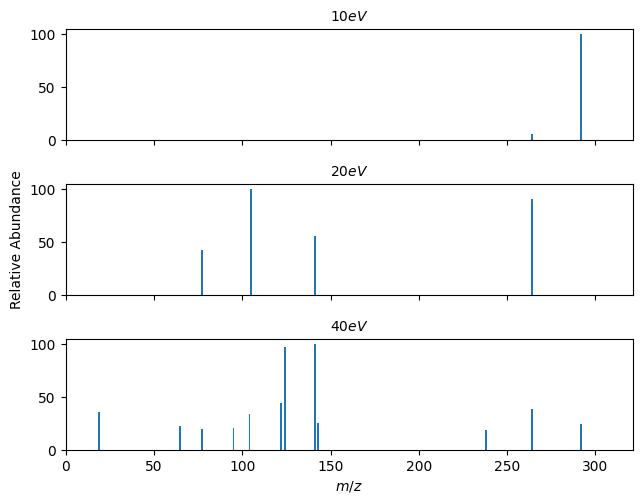

In [98]:
def plot_positive_msms(energy_0, energy_1, energy_2, save_path=None):
    figure, axis = plt.subplots(3, 1)
    figure.tight_layout()

    max_x_value = max(energy_0[:, 0]) + max(energy_0[:, 0]) * 0.1

    axis[0].bar(energy_0[:, 0], energy_0[:, 1], width=1)
    axis[0].set_xlim(0, max_x_value)
    axis[0].xaxis.set_ticklabels([])
    axis[0].set_title("$10eV$", fontsize=10)

    axis[1].bar(energy_1[:, 0], energy_1[:, 1], width=1)
    axis[1].set_xlim(0, max_x_value)
    axis[1].xaxis.set_ticklabels([])
    axis[1].set_title("$20eV$", fontsize=10)

    axis[2].bar(energy_2[:, 0], energy_2[:, 1], width=1)
    axis[2].set_xlim(0, max_x_value)
    axis[2].set_title("$40eV$", fontsize=10)

    axis[2].set_xlabel("$m/z$")
    axis[1].set_ylabel("Relative Abundance")

    if save_path is not None:
        plt.savefig(save_path / "pos_msms.png", dpi=300, bbox_inches="tight")
    plt.show()


random_sample = df.sample(1).iloc[0]

energy_10ev = np.vstack(random_sample["msms_cfmid_negative_10ev"])
energy_20ev = np.vstack(random_sample["msms_cfmid_negative_20ev"])
energy_40ev = np.vstack(random_sample["msms_cfmid_negative_40ev"])

plot_negative_msms(energy_10ev, energy_20ev, energy_40ev)

## Plot HSQC NMR

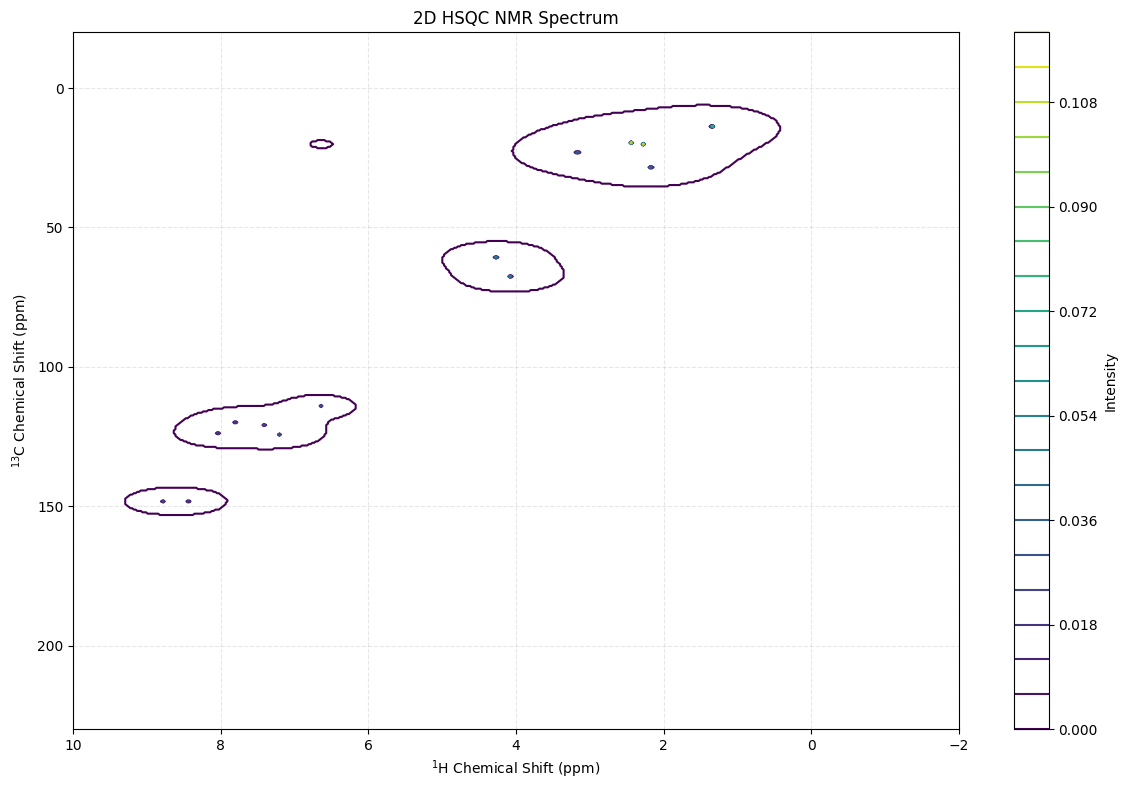

In [13]:

def plot_hsqc_spectrum(hsqc_spectrum,h_shifts, c_shifts, title="2D HSQC NMR Spectrum"):

    # Create a sample intensity matrix (normally this would come from your dataframe)
    # For demonstration, creating a simulated intensity matrix
    # In real usage, replace this with actual data from your dataframe
    
    # Create the figure and axis
    plt.figure(figsize=(12, 8))
    
    # Create the contour plot
    plt.contour(h_shifts, c_shifts, hsqc_spectrum, 
                levels=20, 
                cmap='viridis')
    
    # Customize the plot
    plt.gca().invert_xaxis()  # Invert x-axis as per NMR convention
    plt.gca().invert_yaxis()  # Invert y-axis as per NMR convention
    
    # Add labels and title
    plt.xlabel('$^{1}$H Chemical Shift (ppm)')
    plt.ylabel('$^{13}$C Chemical Shift (ppm)')
    plt.title(title)
    
    # Add colorbar
    plt.colorbar(label='Intensity')
    
    # Add grid
    plt.grid(True, linestyle='--', alpha=0.3)
    
    # Adjust layout
    plt.tight_layout()
    plt.show()
    return 



random_sample = df.sample(1).iloc[0]

hsqc_spectrum = np.vstack(random_sample["hsqc_nmr_spectrum"])
h_spec_dim = meta_data['hsqc_nmr_spectrum']['dimensions']['h']
c_spec_dim = meta_data['hsqc_nmr_spectrum']['dimensions']['c']

plot_hsqc_spectrum(hsqc_spectrum, h_spec_dim, c_spec_dim)
